# count of Request type by date Opened

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hub_nash=pd.read_csv('../data/hubNashville__311__Service_Requests.csv')

C:\Users\arikh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hub_nash.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 09:46:53 PM,04/28/2020 09:46:53 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 05:09:02 PM,04/28/2020 05:09:02 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 08:50:36 PM,04/28/2020 08:50:36 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,...,False,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618,"(36.32619, -86.70061799999999)"


In [4]:
hub_nash['Council District'].value_counts()

19.0    18781
21.0    15931
6.0     14541
17.0    13453
5.0     12846
24.0    11674
7.0     11331
20.0    11322
15.0    11011
2.0     10750
25.0    10295
16.0     9881
8.0      9558
33.0     8405
23.0     7858
29.0     7856
18.0     7808
1.0      7106
26.0     6721
28.0     6257
34.0     6066
30.0     5888
9.0      5845
3.0      5766
32.0     5508
27.0     5305
13.0     5154
31.0     4896
4.0      4598
14.0     4180
11.0     3745
12.0     2863
22.0     2628
35.0     2537
10.0     2210
Name: Council District, dtype: int64

In [6]:
hub_nash_after=hub_nash.drop(columns= ['State Issue',
                                 'Preferred Language',
                                 'Mapped Location' ])

In [7]:
#hub_nash = hub_nash[["Council District", "Request Type"]]

In [8]:
hub_nash_after.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 09:46:53 PM,04/28/2020 09:46:53 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 05:09:02 PM,04/28/2020 05:09:02 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 08:50:36 PM,04/28/2020 08:50:36 PM,Phone,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618


In [11]:
type(hub_nash_after)

pandas.core.frame.DataFrame

In [94]:
#create new date and add the date format, not prefered because this will change the dtype to str
hub_nash_after['date'] = hub_nash_after['Date / Time Opened'].dt.strftime('%m/%d/%Y')

In [95]:
#change the dtype for date
hub_nash_after['date'] = pd.to_datetime(hub_nash_after['date'], errors='coerce')

#hub_nash_after['Date / Time Closed'] = pd.to_datetime(hub_nash_after['Date / Time Closed'], errors='coerce')

In [96]:
hub_nash_after['date'].head()

0   2020-04-28
1   2020-04-28
2   2020-04-28
3   2020-04-28
4   2020-03-29
Name: date, dtype: datetime64[ns]

In [97]:
hub_nash_after['date'] = pd.to_datetime(hub_nash_after['date']).dt.date

In [98]:
#rename colum
hub_nash_after=hub_nash_after.rename(columns={"Request Type":"RequestType"})

In [99]:
clean_hub_nash=hub_nash_after.dropna(subset=['Date / Time Opened','RequestType'])

In [100]:
#clean_hub_nash=clean_hub_nash.groupby(['date', 'RequestType'] )['RequestType'].count()
#clean_hub_nash.head()

In [101]:
council_hub_nash=clean_hub_nash.groupby(['date',
                                         'RequestType'
                                         ]).RequestType.agg('count').to_frame('count')

In [102]:
council_hub_nash

count
date       RequestType                      
2017-07-17 Education & Libraries           1
           Electric & Water General        5
           Other                           2
           Parks                           1
           Permits                         2
...                                      ...
2020-05-13 Permits                         1
           Property Violations             4
           Public Safety                   8
           Streets, Roads & Sidewalks     10
           Trash, Recycling & Litter       6

[8236 rows x 1 columns]

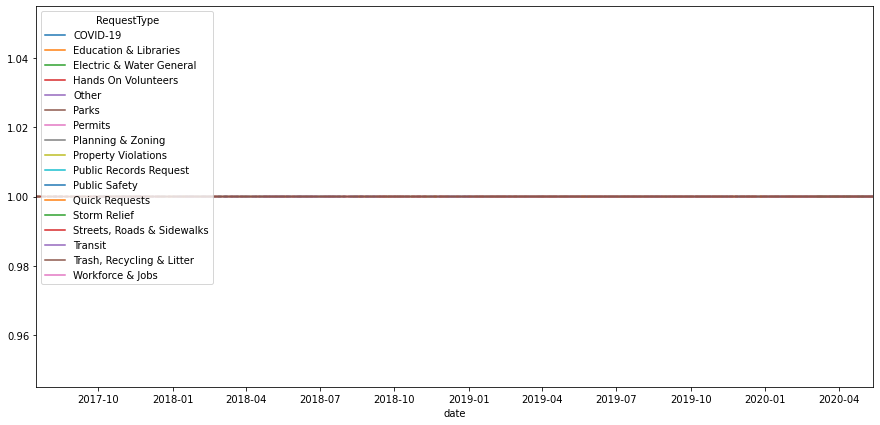

In [103]:
 #plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
council_hub_nash.groupby(['date','RequestType']).count()['count'].unstack().plot(ax=ax)